# EXPLORATION

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


## Extrait et Shape du Dataset

In [ ]:
## Paths
folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
# folder_path_Y = 'C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON'
# folder_path_C = '../data/raw/Sales'
# folder_path_L = '/Users/loick.d/Documents/Datascientest/Github immo/MAR25_BDS_Compagnon_Immo/'
# folder_path_LW = 'C:/Users/User/Downloads/drive-download-20250508T155351Z-1-001'





## Load dataset
input_file = os.path.join(folder_path_M, 'merged_sales_data.csv')
# input_file = os.path.join(folder_path_Y, 'merged_sales_data.csv')
# input_file = os.path.join(folder_path_C, 'merged_sales_data.csv')
# input_file = os.path.join(folder_path_L, 'merged_sales_data.csv')
# input_file = os.path.join(folder_path_LW, 'merged_sales_data.csv')

chunksize = 100000  # Number of rows per chunk
chunks = pd.read_csv(input_file, sep=';', chunksize=chunksize, index_col=None, on_bad_lines='skip', low_memory=False)

# Process chunks
df_sales = pd.concat(chunk for chunk in chunks)

# Configurer Pandas pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes
pd.set_option('display.width', 1000)       # Ajuste la largeur pour éviter les coupures
pd.set_option('display.colheader_justify', 'center')  # Centre les noms des colonnes

print("\n","extrait du Dataset" , df_sales.head(), "\n")
print("\n","Shape du Dataset",df_sales.shape, "\n")



 extrait du Dataset           idannonce         type_annonceur typedebien typedetransaction  etage  surface  surface_terrain  nb_pieces  prix_bien  prix_maison  prix_terrain  mensualiteFinance  balcon  eau  bain dpeL  dpeC   mapCoordonneesLatitude  mapCoordonneesLongitude annonce_exclusive  nb_etages parking  places_parking  cave  exposition ges_class  annee_construction  nb_toilettes  nb_terraces videophone porte_digicode  surface_balcon ascenseur  nb_logements_copro  charges_copro chauffage_energie chauffage_systeme chauffage_mode categorie_annonceur logement_neuf  duree_int typedebien_lite   date   INSEE_COM  IRIS CODE_IRIS TYP_IRIS_x TYP_IRIS_y GRD_QUART UU2010  REG DEP  loyer_m2_median_n6  nb_log_n6  taux_rendement_n6  loyer_m2_median_n7  nb_log_n7  taux_rendement_n7  prix_m2_vente
0  entities-1037638-4560933       pr            m              v           0       79         470.0           4       241000       NaN           NaN               0             0     0     1    0     N

## Gestion des Doublons

In [3]:
print("Nombres de lignes en double", df_sales.duplicated().sum())

df_sales.drop_duplicates(inplace=True)

print("Nombres de lignes en double après suppression", df_sales.duplicated().sum())
print("Shape du Dataset après élimination des doublons : ",df_sales.shape)

Nombres de lignes en double 0
Nombres de lignes en double après suppression 0
Shape du Dataset après élimination des doublons :  (4935936, 59)


## Gestion des NANs

### Proportions des NANs

In [4]:
missing_data_percentage_sales = df_sales.isna().sum()*100/len(df_sales)

missing_value_percentage_sales = pd.DataFrame({'column_name': df_sales.columns,
                                         'percent_missing': missing_data_percentage_sales,
                                         'dtypes':df_sales.dtypes}
                                         ).sort_values(by='percent_missing', ascending=False)

# Resetting the index to start from 1 for better readability
# and to match the original DataFrame's index
missing_value_percentage_sales.index = range(1, len(missing_value_percentage_sales) + 1)

display(missing_value_percentage_sales)

,column_name,percent_missing,dtypes
1,parking,99.761423,object
2,videophone,99.005579,object
3,prix_terrain,98.686490,float64
4,prix_maison,98.677738,float64
5,surface_balcon,97.638523,float64
6,nb_terraces,80.589598,float64
7,charges_copro,72.698268,float64
8,porte_digicode,72.553980,object
9,nb_logements_copro,72.326525,float64
10,ascenseur,70.922334,object


### Visualisation des NANs

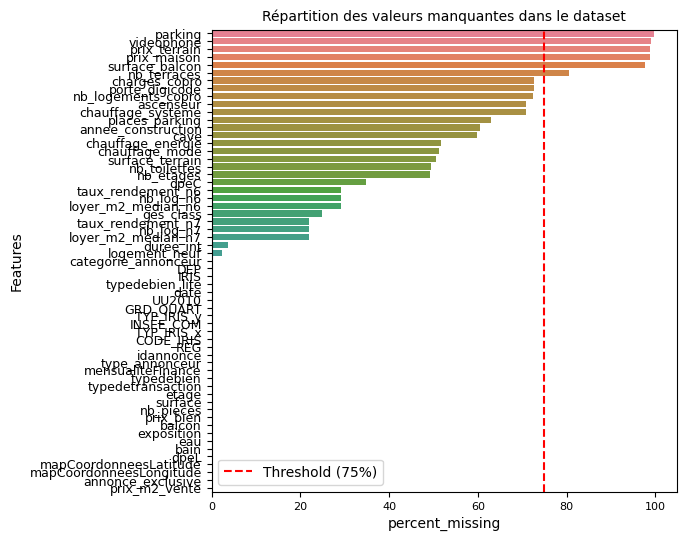

In [5]:
plt.figure(figsize=(6, 6))

sns.barplot(
    y=missing_value_percentage_sales.column_name,
    x=missing_value_percentage_sales.percent_missing,
    hue=missing_value_percentage_sales.column_name,
    order=missing_value_percentage_sales.column_name
)

# Add a vertical line at x=50 (adjust as needed)
plt.axvline(x=75, color='red', linestyle='--', label='Threshold (75%)')

plt.title('Répartition des valeurs manquantes dans le dataset', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.ylabel('Features')
plt.legend()

plt.show()



### Elimination de colonnes (valeurs manquantes supérieures à 75 %)

In [6]:
# Filtrer les colonnes avec un taux de valeurs manquantes inférieur ou égal à 75%
columns_to_keep = missing_data_percentage_sales[missing_data_percentage_sales <= 75].index

# Mettre à jour le DataFrame en gardant uniquement les colonnes sélectionnées
df_sales_short_1 = df_sales[columns_to_keep]

print("Colonnes conservées :", list(columns_to_keep))
print("\nShape du Dataset après élimination des colonnes :", df_sales_short_1.shape)

Colonnes conservées : ['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction', 'etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien', 'mensualiteFinance', 'balcon', 'eau', 'bain', 'dpeL', 'dpeC', 'mapCoordonneesLatitude', 'mapCoordonneesLongitude', 'annonce_exclusive', 'nb_etages', 'places_parking', 'cave', 'exposition', 'ges_class', 'annee_construction', 'nb_toilettes', 'porte_digicode', 'ascenseur', 'nb_logements_copro', 'charges_copro', 'chauffage_energie', 'chauffage_systeme', 'chauffage_mode', 'categorie_annonceur', 'logement_neuf', 'duree_int', 'typedebien_lite', 'date', 'INSEE_COM', 'IRIS', 'CODE_IRIS', 'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG', 'DEP', 'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6', 'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7', 'prix_m2_vente']

Shape du Dataset après élimination des colonnes : (4935936, 53)


# DATAVIZ

### Modalités des variables ( moins de 10 modalités )

In [7]:
# Combine object and numerical columns
columns_to_check = df_sales_short_1.select_dtypes(include=['object', 'int64', 'float64']).columns

columns_checked = []

# Iterate through each column and filter unique values with less than 10, excluding NaN
for col in columns_to_check:
    unique_values = df_sales_short_1[col].dropna().unique()  # Exclude NaN values
    if len(unique_values) < 10:
        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print("-" * 50)
        columns_checked.append(col)

# Nous considérons à ce stade que les colonnes avec moins de 10 valeurs uniques sont des variables catégorielles

Column: type_annonceur
Unique Values: ['pr' 'pa']
--------------------------------------------------
Column: typedebien
Unique Values: ['m' 'a' 'an' 'mn' 'Maison/Villa neuve' 'h' 'l']
--------------------------------------------------
Column: typedetransaction
Unique Values: ['v' 'vp' 'pi']
--------------------------------------------------
Column: annonce_exclusive
Unique Values: ['0' 'Oui' 'Non']
--------------------------------------------------
Column: cave
Unique Values: [False True]
--------------------------------------------------
Column: porte_digicode
Unique Values: [False True]
--------------------------------------------------
Column: ascenseur
Unique Values: [False True]
--------------------------------------------------
Column: chauffage_mode
Unique Values: ['Individuel' 'Collectif' 'Individuel, Central' 'Central'
 'Collectif, Central' 'Collectif, Individuel'
 'Collectif, Individuel, Central']
--------------------------------------------------
Column: categorie_annonceur


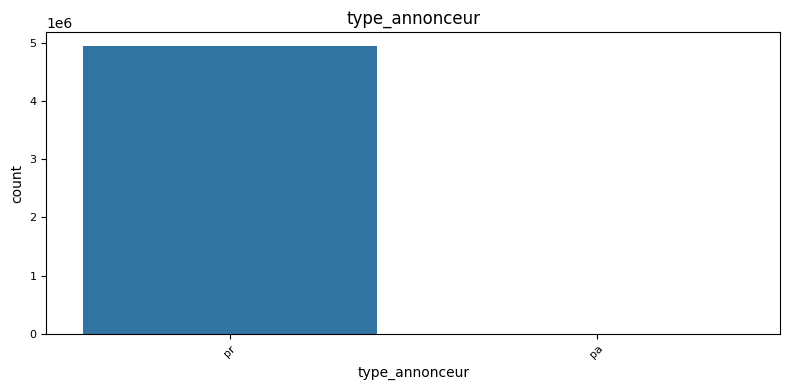

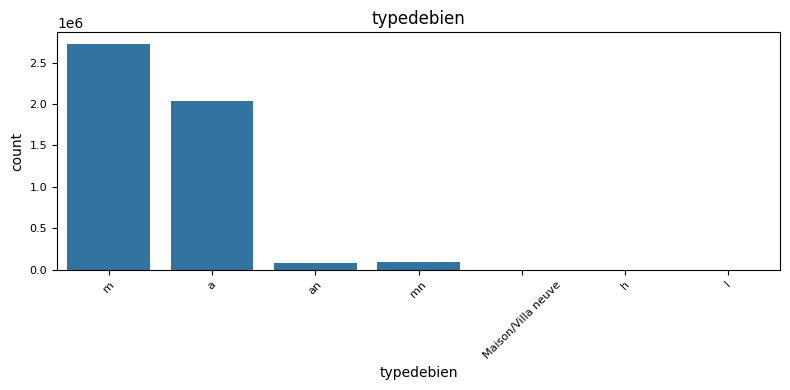

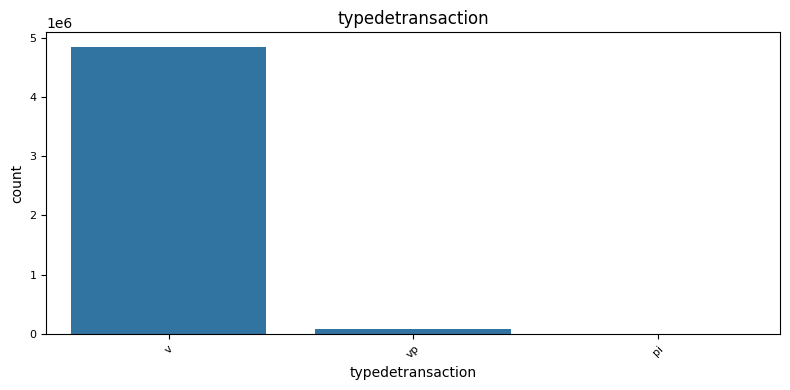

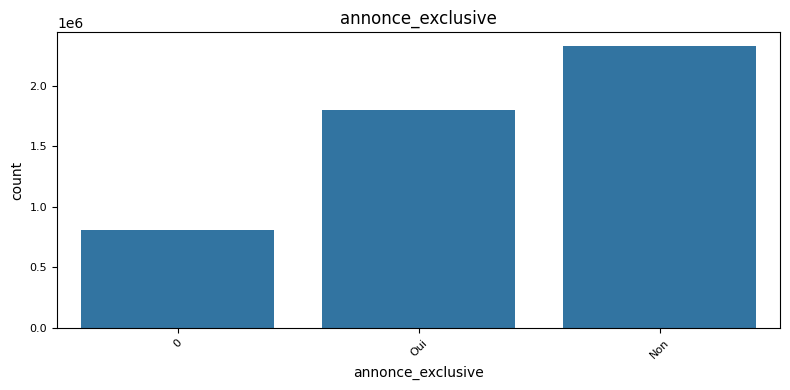

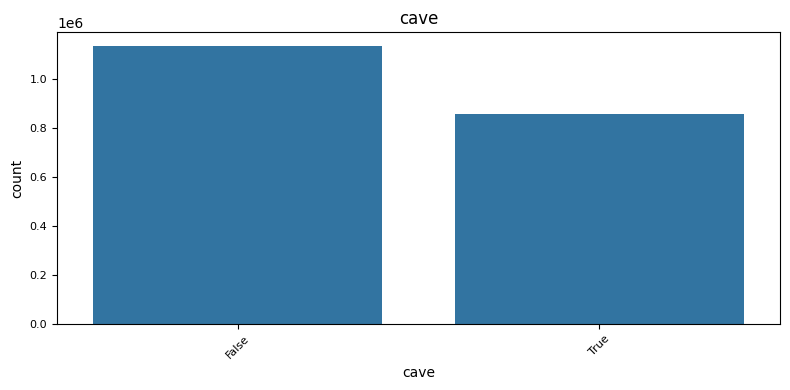

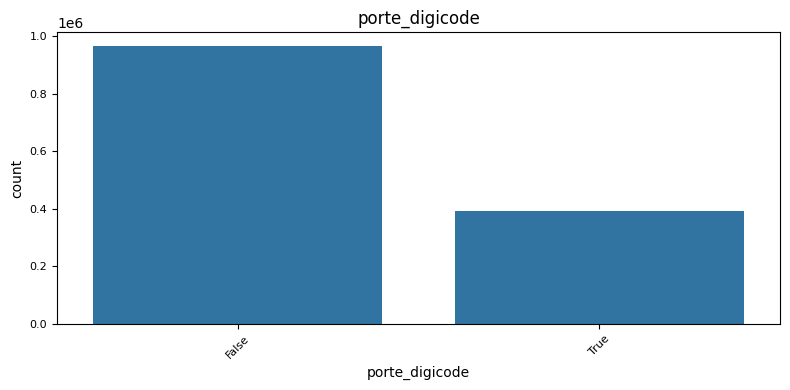

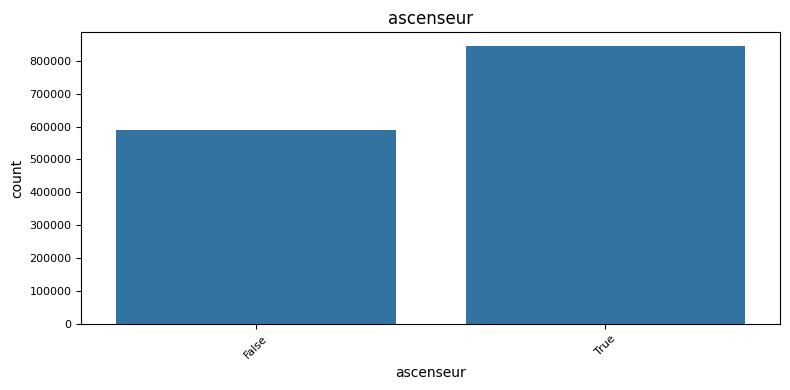

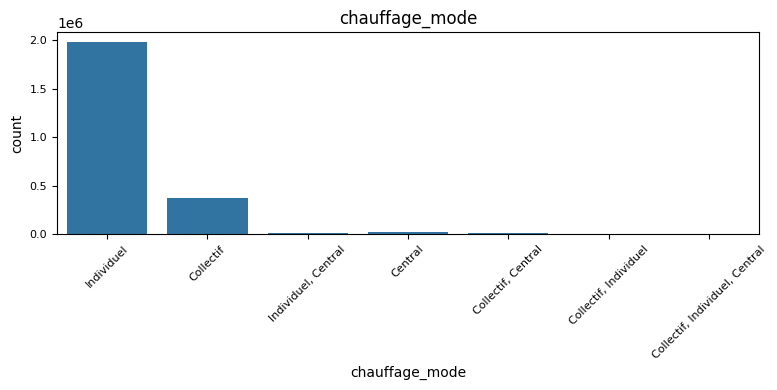

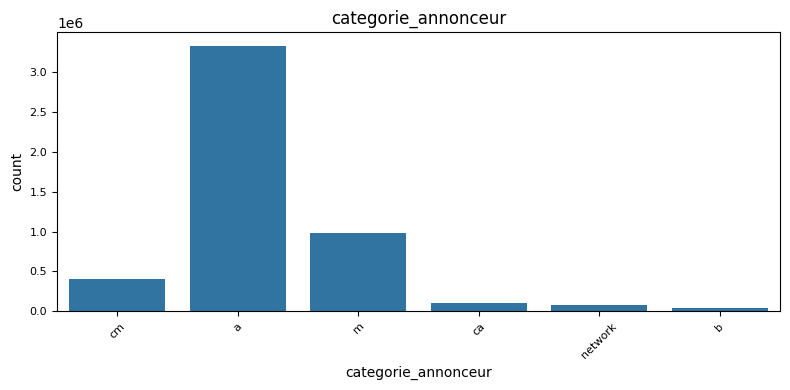

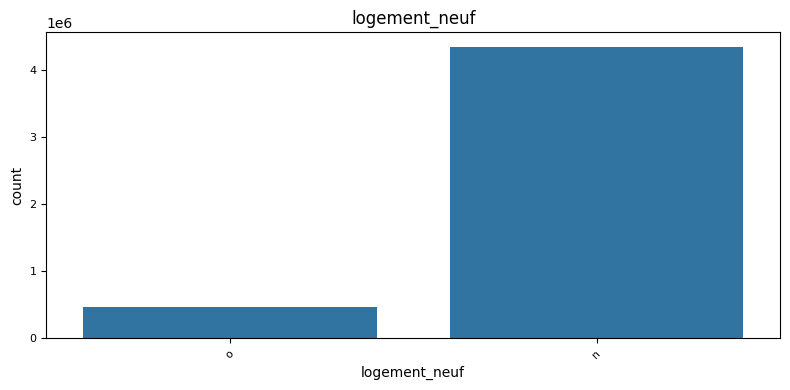

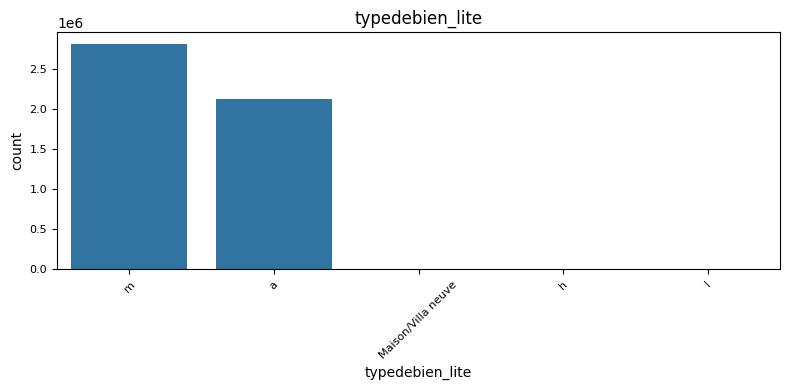

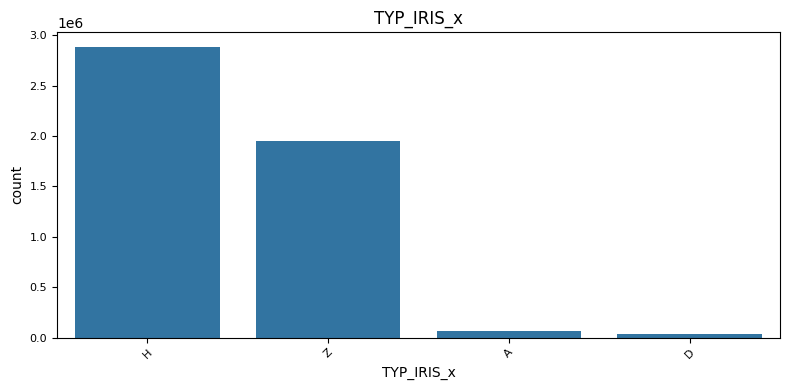

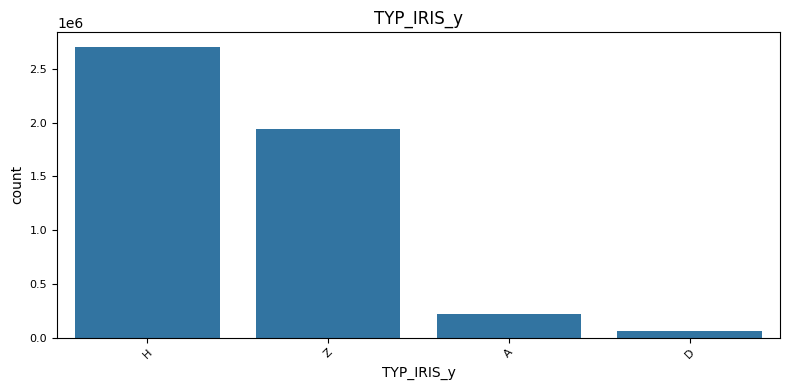

In [8]:
for var_to_viz in columns_checked:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_sales_short_1, x=var_to_viz)
    plt.title(f'{var_to_viz}')
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

### Modalités des autres variables ( plus de 10 modalités )

In [9]:
columns_investigated = columns_checked
df_sales_remaining = df_sales_short_1.drop(columns_investigated,axis=1)

columns_to_check = df_sales_remaining.select_dtypes(include=['object']).columns
columns_checked = []

# Iterate through each column and filter unique values with less than 10, excluding NaN
for col in columns_to_check:
    unique_values = df_sales_remaining[col].dropna().unique()  # Exclude NaN values
    if len(unique_values) > 10:
        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print("-" * 50)
        columns_checked.append(col)

# Nous considérons à ce stade que les colonnes avec plus de 10 valeurs uniques sont 
# soit des variables numériques continues soit des variablles catégorielles à traiter car proposant trop de modes
# Nous sortons donc les valeurs uniques de ces colonnes pour les investiguer

Column: idannonce
Unique Values: ['entities-1037638-4560933' 'immo-facile-57743459'
 'entities-1037666-4560741' ... 'orpi-1-129011E1Q7IG'
 'orpi-1-129011E1W58D' 'orpi-1-129011E1L4UB']
--------------------------------------------------
Column: dpeL
Unique Values: ['0' 'D' 'G' 'A' 'C' 'E' 'NS' 'F' 'VI' 'B' 'Blank' 'B kWh/m².year' '856'
 'D kWh/m².year' 'A kWh/m².year' 'E kWh/m².year' 'C kWh/m².year'
 'Classe indeterminee' "'" '0 kWh/m².year' 'F kWh/m².year'
 'D - 231 kWh/m².year' 'D-218 kWh/m².year' '26']
--------------------------------------------------
Column: exposition
Unique Values: ['0' 'Sud-Ouest' 'Sud' 'Sud-Est' 'Sud/Est' 'Est' 'SO' 'Ouest' 'E, S'
 'Est-Ouest' 'Nord-Ouest' 'Nord-Sud' 'sud-ouest' 'sud-est'
 'Traversant-Est-Ouest' 'traversant' 'Nord' 'traversant nord-sud'
 'nord-est / sud-ouest' 'Sud-Est-Ouest' 'Nord-Est' 'OUEST' 'NE'
 'Sud/Ouest' 'NS' 'Nord Sud Est' 'SUD' 'SUD OUEST' 'Nord/Ouest'
 'Nord Sud Est Ouest' 'SUD EST' 'Nord-ouest' 'nord-ouest / sud-est'
 'EST SUD OUEST'

# PRÉSÉLECTION (VARIABLES EXPLICATIVES À ÉLIMINER)

> La colonne 'idannonce' est un identifiant unique pour chaque annonce, elle n'est pas utile pour l'analyse

> La colonne 'annonce_exclusive' est une variable qui n'est pas utile pour l'analyse

> La colonne 'typedebien' et 'typedebien_lite' contiennent les mêmes informations; nous gardons la plus riche des deux : 'typedebien

> La colonne 'type_annonceur' offre une distribution de valeurs trop déséquilibrée

> La colonne 'duree_int' n'est pas interprétable (valeurs négatives, compréhension empirique)

> Les colonnes 'REG', 'DEP', 'IRIS', 'CODE_IRIS', 'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010' sont des colonnes contenant de l'information redondante, de plus nous créerons une nouvelle colonne pour le code postal, générée à partir des coordonnées géographiques

> nous gardons la colonne 'INSEE_COM' pour l'utiliser lors de la gestion des outliers

In [10]:
df_sales_short_2 = df_sales_short_1.drop(columns=['idannonce', 'annonce_exclusive', 'typedebien_lite', 
                                                  'type_annonceur', 'categorie_annonceur',
                                                  'REG', 'DEP', 'IRIS', 'CODE_IRIS', 'TYP_IRIS_x', 'TYP_IRIS_y',
                                                  'nb_logements_copro',
                                                  'GRD_QUART', 'UU2010', 'duree_int'], axis=1)

df_sales_short_2.shape

(4935936, 38)

### Liste colonnes restantes et vérification des NaNs

In [11]:
missing_data_percentage_sales = df_sales_short_2.isna().sum()*100/len(df_sales_short_2)

missing_value_percentage_sales = pd.DataFrame({'column_name': df_sales_short_2.columns,
                                         'percent_missing': missing_data_percentage_sales,
                                         'dtypes':df_sales_short_2.dtypes}
                                         ).sort_values(by='percent_missing', ascending=False)

# Resetting the index to start from 1 for better readability
# and to match the original DataFrame's index
missing_value_percentage_sales.index = range(1, len(missing_value_percentage_sales) + 1)

display(missing_value_percentage_sales)

,column_name,percent_missing,dtypes
1,charges_copro,72.698268,float64
2,porte_digicode,72.553980,object
3,ascenseur,70.922334,object
4,chauffage_systeme,70.857726,object
5,places_parking,62.945934,float64
6,annee_construction,60.431051,float64
7,cave,59.695831,object
8,chauffage_energie,51.726461,object
9,chauffage_mode,51.281500,object
10,surface_terrain,50.614210,float64


# VARIABLES EXPLICATIVES À TRAITER

In [12]:
# les variables porte_digicode, ascenseur et cave sont des variables binaires typées en 'object'
# nous les transofrmins en type boleeen
bool_columns = ['porte_digicode', 'cave', 'ascenseur']
for col in bool_columns:
    df_sales_short_2[col] = df_sales_short_2[col].astype(bool)

# vérification des types des colonnes converties
df_sales_short_2[bool_columns].dtypes

porte_digicode    bool
cave              bool
ascenseur         bool
dtype: object

## Dicrétisations

### La variable "annee_construction" est transformée en variable catégorielle nominale

In [13]:
# La variable "annee_construction" est transformée en variable catégorielle non ordinale :

# Définir les plages et les catégories (plages trouvées du le net comme étant celles correspondant à des ensembles cohérents)
bins = [float('-inf'), 1948, 1974, 1977, 1982, 1988, 2000, 2005, 2012, 2021, float('inf')]
labels = [
    "avant 1948", "1948-1974", "1975-1977", "1978-1982", "1983-1988",
    "1989-2000", "2001-2005", "2006-2012", "2013-2021", "après 2021"
]
df_sales_short_2['annee_construction'] = pd.cut(df_sales_short_2['annee_construction'], bins=bins, labels=labels, right=False)
# Vérification de la transformation
print(df_sales_short_2['annee_construction'].head())


0           NaN
1    avant 1948
2           NaN
3     1948-1974
4           NaN
Name: annee_construction, dtype: category
Categories (10, object): ['avant 1948' < '1948-1974' < '1975-1977' < '1978-1982' ... '2001-2005' < '2006-2012' < '2013-2021' < 'après 2021']


### DPeL et ges_class

In [14]:
# Cellule : Nettoyage DPE/GES, chauffage principal et exposition

import re               
import numpy as np      
import pandas as pd     

# 1. Fonctions utilitaires

def clean_classe(val):
    """
    Nettoie et standardise les classes DPE/GES :
    - Vide, "Blank" ou "0" → np.nan
    - Conserve A→G, NS, VI
    - Sinon, extrait un code valide en début de chaîne via regex
    """
    # Cas manquant
    if pd.isna(val) or str(val).strip() in ["", "Blank", "0"]:
        return np.nan
    # Mise en majuscule et suppression des espaces
    s = str(val).strip().upper()
    # Acceptation stricte des codes connus
    if s in ["A","B","C","D","E","F","G","NS","VI"]:
        return s
    # Tentative de capture d'un code valide en début de chaîne
    m = re.match(r"^(NS|VI|[A-G])", s, re.IGNORECASE)
    return m.group(1).upper() if m else np.nan


def extract_principal(val):
    """
    Extrait la première source énergétique listée.
    Séparateurs gérés : ',', ';', '/', 'et'
    """
    # Cas manquant ou chaîne vide
    if pd.isna(val) or not str(val).strip():
        return np.nan
    # Split sur les séparateurs, on ne garde que la première partie
    parts = re.split(r"\s*(?:,|;|/|et)\s*", str(val).strip(), maxsplit=1)
    return parts[0] if parts else np.nan


# Configuration pour la normalisation de l'exposition
PATTERN_EXPO = r"(?i)\b(?:Nord(?:-Est|-Ouest)?|Sud(?:-Est|-Ouest)?|Est|Ouest|N|S|E|O)\b"
ORDRE_EXPO  = ["Nord","Est","Sud","Ouest"]
NORM_DIR    = {
    "N":"Nord","S":"Sud","E":"Est","O":"Ouest",
    "NORD":"Nord","SUD":"Sud","EST":"Est","OUEST":"Ouest",
    "NORD-EST":"Nord-Est","NORD-OUEST":"Nord-Ouest",
    "SUD-EST":"Sud-Est","SUD-OUEST":"Sud-Ouest"
}

def clean_exposition(val):
    """
    Nettoie et standardise la colonne exposition :
    - Détecte les mots-clés de multi-exposition → "Multi-exposition"
    - Extrait les points cardinaux via regex
    - Traduit et normalise selon NORM_DIR
    - Trie et déduplique selon ORDRE_EXPO
    """
    # Cas manquant ou valeur vide
    if pd.isna(val) or str(val).strip() in ["","0"]:
        return np.nan
    s   = str(val).strip()
    low = s.lower()
    # 1) Multi-exposition via mots-clés
    if any(kw in low for kw in ["traversant","multi","toutes","double expo","triple","360"]):
        return "Multi-exposition"
    # 2) Extraction des directions
    matches = re.findall(PATTERN_EXPO, s, flags=re.IGNORECASE)
    dirs = [
        NORM_DIR[m.upper().replace(" ","-")]
        for m in matches
        if m.upper().replace(" ","-") in NORM_DIR
    ]
    # 3) Tri et déduplication
    uniq = sorted(set(dirs), key=lambda d: ORDRE_EXPO.index(d.split("-")[0]))
    return "-".join(uniq) if uniq else np.nan


# 2. Application des fonctions sur df_sales_short_2

# 2.1 : Nettoyage des colonnes DPE et GES
for col in ("dpeL","ges_class"):
    if col in df_sales_short_2.columns:
        df_sales_short_2[col] = (
            df_sales_short_2[col]
            .apply(clean_classe)    # Applique clean_classe à chaque valeur
            .astype("object")       # Force le type chaîne pour les résultats
        )

# 2.2 : Extraction de l'énergie de chauffage principale
if "chauffage_energie" in df_sales_short_2.columns:
    df_sales_short_2["chauffage_energie_principal"] = (
        df_sales_short_2["chauffage_energie"]
            .apply(extract_principal)  # Garde la première source énergétique
            .astype("object")
    )

# 2.3 : Nettoyage de la colonne exposition
if "exposition" in df_sales_short_2.columns:
    df_sales_short_2["exposition"] = (
        df_sales_short_2["exposition"]
            .apply(clean_exposition)   # Standardise les orientations
            .astype("object")
    )

# 3. Contrôles rapides pour valider le nettoyage

# Affiche un aperçu des premières lignes
display(df_sales_short_2[[
    "dpeL",
    "ges_class",
    "chauffage_energie_principal",
    "exposition"
]].head(10))

# Liste des valeurs uniques par colonne
print("Classes DPE :", df_sales_short_2["dpeL"].unique())
print("Classes GES :", df_sales_short_2["ges_class"].unique())
print("Énergies principales :", df_sales_short_2["chauffage_energie_principal"].unique())
print("Expositions :", df_sales_short_2["exposition"].unique())

,dpeL,ges_class,chauffage_energie_principal,exposition
0,NaN,NaN,NaN,NaN
1,D,D,Fioul,NaN
2,NaN,NaN,NaN,NaN
3,D,D,NaN,NaN
4,D,D,NaN,NaN
5,G,G,Fioul,Sud-Ouest
6,A,A,NaN,NaN
7,G,G,Fioul,Sud
8,C,D,Gaz,Sud-Est
9,E,B,Électrique,Sud


Classes DPE : [nan 'D' 'G' 'A' 'C' 'E' 'NS' 'F' 'VI' 'B']
Classes GES : [nan 'D' 'G' 'A' 'B' 'C' 'E' 'NS' 'F' 'VI']
Énergies principales : [nan 'Fioul' 'Gaz' 'Électrique' 'Bois']
Expositions : [nan 'Sud-Ouest' 'Sud' 'Sud-Est' 'Est-Sud' 'Est' 'Ouest' 'Est-Ouest'
 'Nord-Ouest' 'Nord-Sud' 'Multi-exposition' 'Nord' 'Nord-Est-Sud-Ouest'
 'Sud-Est-Ouest' 'Nord-Est' 'Nord-Est-Sud' 'Nord-Ouest-Sud-Est'
 'Est-Sud-Ouest' 'Nord-Sud-Ouest' 'Nord-Est-Ouest' 'Sud-Sud-Est'
 'Est-Sud-Est' 'Nord-Est-Nord-Ouest' 'Sud-Ouest-Sud' 'Nord-Sud-Est'
 'Nord-Nord-Est' 'Nord-Sud-Est-Ouest' 'Nord-Ouest-Est' 'Nord-Est-Sud-Est'
 'Sud-Ouest-Sud-Est' 'Sud-Ouest-Sud-Ouest' 'Nord-Ouest-Sud-Ouest'
 'Nord-Est-Sud-Ouest-Sud-Est' 'Nord-Nord-Ouest']


In [15]:
df_sales_short_2.isna().sum()
#df_sales_short_2.info()


typedebien                           0
typedetransaction                    0
etage                                0
surface                              0
surface_terrain                2498285
nb_pieces                            0
prix_bien                            0
mensualiteFinance                    0
balcon                               0
eau                                  0
bain                                 0
dpeL                            729061
dpeC                           1714300
mapCoordonneesLatitude               0
mapCoordonneesLongitude              0
nb_etages                      2434131
places_parking                 3106971
cave                                 0
exposition                     3671341
ges_class                      1230129
annee_construction             2982838
nb_toilettes                   2436608
porte_digicode                       0
ascenseur                            0
charges_copro                  3588340
chauffage_energie        

# VARIABLE CIBLE ET VARIABLES CORRÉLÉES À LA CIBLE

## Suppression des variables fortement corrélées au target (prix_m2_vente)

La variable cible est "prix_m2_vente"

> Certaines variables du csv de part leur nature pourraient être trop corrélées avec la variable cible  :
> prix, mensualité, etc.

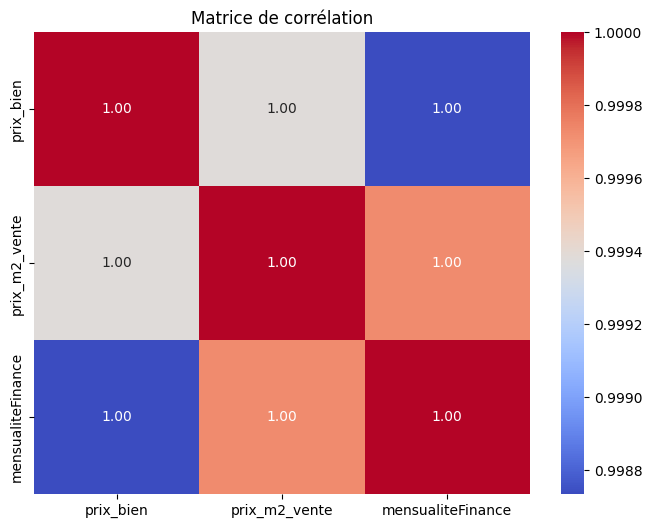

In [16]:
# Calculer la matrice de corrélation
correlation_matrix = df_sales_short_2[['prix_bien', 'prix_m2_vente','mensualiteFinance']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

> On va donc supprimer ces variables de la base de données :

In [17]:
# On va donc supprimer ces variables de la base de données et renommer le DataFrame:
df_sales_short_3 = df_sales_short_2.drop(columns=['prix_bien', 'mensualiteFinance' ], axis=1)
df_sales_short_3.shape


(4935936, 37)

## Visualisation de la distribution de la variable cible

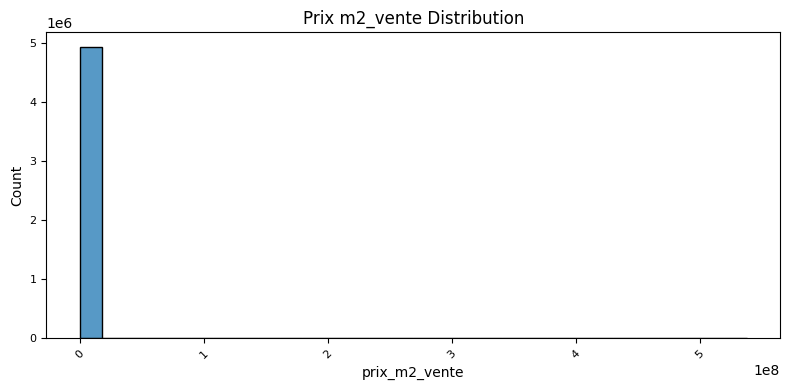

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_sales_short_3, x='prix_m2_vente', bins=30)
plt.title('Prix m2_vente Distribution')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

> Il est problable qu'il y ait eu un problème de collectecte et la présence d'outliers, nous allons les traiter 

# GESTION DES OUTLIERS ET DES VALEURS ABERRANTES

### Visualisation des distributions des variables numériques avec Boxplots 

Avant traitements

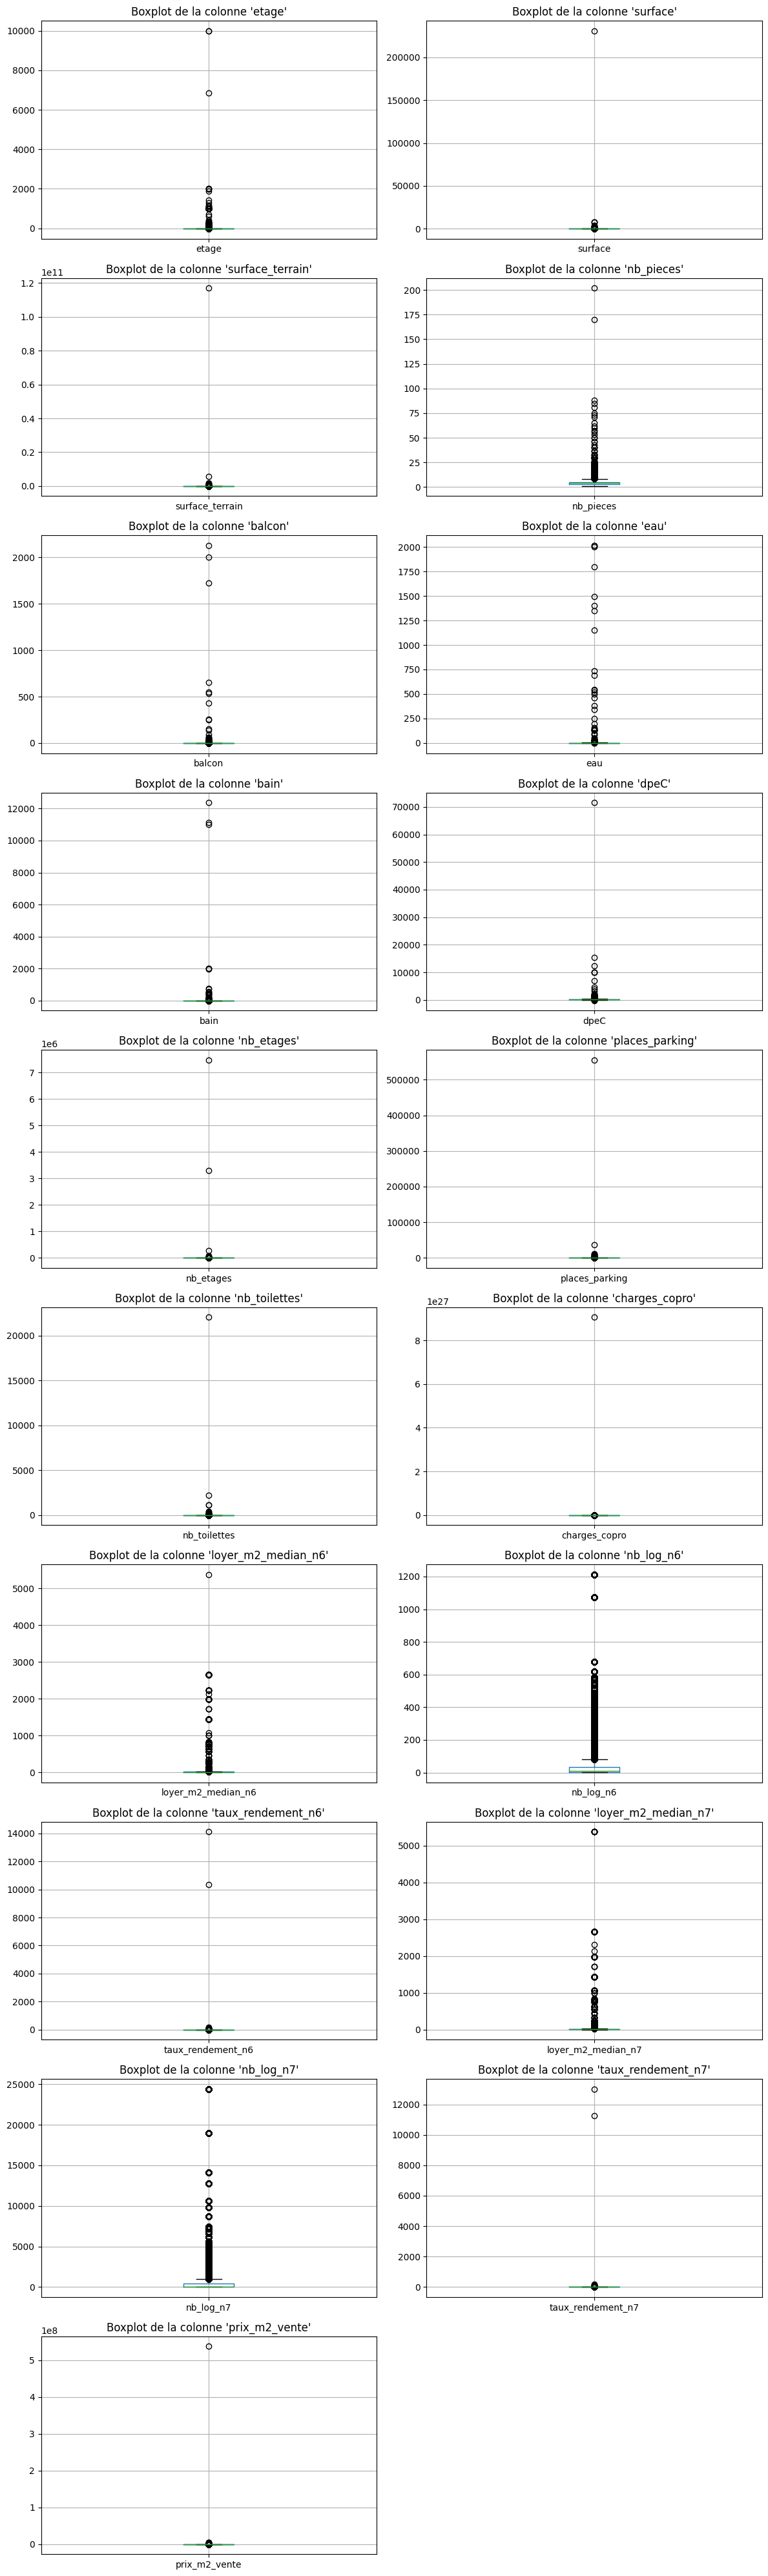

In [19]:
import math

# Future colonne de regroupement pour les outliers
GROUP_COL    = 'INSEE_COM'  # colonne de regroupement

# Identification des colonnes numériques et exclusion des colonnes de coordonnées géographiques
def get_numeric_cols(data, group_col):
    """
    Retourne les colonnes numériques en excluant la future colonne de regroupement - qui est l'équivalent d'un code postal- pour les outliers à venir plus tard
    et les colonnes de coordonnées géographiques.
    """
    excluded_cols = ['mapCoordonneesLatitude', 'mapCoordonneesLongitude']
    return [
        col for col in data.select_dtypes(include='number').columns
        if col != group_col and col not in excluded_cols
    ]
numeric_cols = get_numeric_cols(df_sales_short_3, GROUP_COL)

# Visualisation des boxplots pour les colonnes restantes

# Nombre de colonnes par ligne
cols_per_row = 2

# Calcul du nombre de lignes nécessaires
num_cols = len(numeric_cols)
num_rows = math.ceil(num_cols / cols_per_row)

# Création des sous-graphiques
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Aplatir pour un accès plus simple

# Boucle pour tracer les boxplots
for i, col in enumerate(numeric_cols):
    df_sales_short_3.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f"Boxplot de la colonne '{col}'")

# Supprimer les axes inutilisés si le nombre de colonnes est impair
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Les boxplots montrent des distributions étonnantes.
Par ailleur certaines variables semblent montrer des problèmes d'unités d'échelle
Il s'agit des variables:    
'charges_copro'
'loyer_m2_median_n6'
'loyer_m2_median_n7'
'taux_rendement_n6' 
'taux_rendement_n7'
'nb_log_n6'
'nb_log_n7'

Nous allons essayer d'intépréter ces colonnes et voir si nous pouvons appliquer un traitement qui a du sens. Si ce n'est pas le cas, nous les éliminons ces colonnes. 

Dans l'ordre nous allons :
- éliminer les valeurs aberrantes via la détection d'anomalies logiques
- éliminer les valeurs aberrantes via les anomalies visuelles (suite aux boxplots)
- traiter les valeurs extrêmes en créant des fonctions de détection des "outliers" et d'imputation par mediane de code INSEE.
- traiter les problèmes d'unités d'échelle si encore apparents
- éliminer les colonnes montrant encore des incohérences

## Anomalies

### Détection des anomalies logiques entre colonnes

In [20]:
# Détection d'anomalies logiques dans les données suite aux boxplots 

# Création d'une colonne 'anomalie_logique' contenant True si une incohérence est détectée

# Copie pour éviter d'altérer la base brute directement
df_logic_check = df_sales_short_3.copy()

# Initialiser la colonne avec False
df_logic_check['anomalie_logique'] = False

# --- Règle 1 : nb_toilettes > nb_pieces (pas logique dans un logement classique)
mask_toilettes = df_logic_check['nb_toilettes'] > df_logic_check['nb_pieces']
df_logic_check.loc[mask_toilettes, 'anomalie_logique'] = True

# --- Règle 2 : surface trop petite (< 10 m²) ou démesurée (> 1000 m²)
mask_surface = (df_logic_check['surface'] < 10) | (df_logic_check['surface'] > 1000)
df_logic_check.loc[mask_surface, 'anomalie_logique'] = True

# --- Règle 3 : nb_etages = 0 alors que etage > 0 (impossible sans étage)
mask_etage = (df_logic_check['nb_etages'] == 0) & (df_logic_check['etage'] > 0)
df_logic_check.loc[mask_etage, 'anomalie_logique'] = True

# --- Règle 4 : logement neuf mais année de construction ancienne (avant 2000)
mask_neuf = (df_logic_check['logement_neuf'] == True) & (
    df_logic_check['annee_construction'].isin(["avant 1948", "1948-1974", "1975-1977", "1978-1982", "1983-1988", "1989-2000"])
)
df_logic_check.loc[mask_neuf, 'anomalie_logique'] = True

# --- Règle 5 : prix_m2_vente très bas ou nul (hors outlier déjà traité)
mask_prix = (df_logic_check['prix_m2_vente'] < 100)
df_logic_check.loc[mask_prix, 'anomalie_logique'] = True

# Résumé : Nombre total de lignes concernées
nb_anomalies = df_logic_check['anomalie_logique'].sum()
print(f"{nb_anomalies} lignes présentent au moins une anomalie logique.")

# Aperçu des premières anomalies détectées
display(df_logic_check[df_logic_check['anomalie_logique']].head(10))

11622 lignes présentent au moins une anomalie logique.


,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,balcon,eau,bain,dpeL,dpeC,mapCoordonneesLatitude,mapCoordonneesLongitude,nb_etages,places_parking,cave,exposition,ges_class,annee_construction,nb_toilettes,porte_digicode,ascenseur,charges_copro,chauffage_energie,chauffage_systeme,chauffage_mode,logement_neuf,date,INSEE_COM,loyer_m2_median_n6,nb_log_n6,taux_rendement_n6,loyer_m2_median_n7,nb_log_n7,taux_rendement_n7,prix_m2_vente,chauffage_energie_principal,anomalie_logique
8896,a,v,1,3,NaN,2,1,1,0,NS,NaN,45.99581,5.04242,NaN,NaN,True,NaN,NaN,NaN,NaN,True,True,800.0,NaN,NaN,NaN,n,2024-03,1443,12.23,14.0,0.003,12.23,14.0,0.003,56633.33,NaN,True
11207,m,v,0,4,495.0,5,0,0,0,C,115.0,45.77119,5.48023,NaN,NaN,False,NaN,A,NaN,NaN,False,True,NaN,NaN,NaN,NaN,n,2023-12,1064,7.91,1.0,0.002,7.91,1.0,0.002,62250.00,NaN,True
12149,m,v,0,110,NaN,1,0,0,3,E,265.0,46.08146,5.46897,4.0,NaN,True,NaN,B,NaN,3.0,True,True,NaN,NaN,NaN,NaN,n,2023-11,1068,NaN,NaN,NaN,NaN,NaN,NaN,1349.09,NaN,True
14398,m,v,0,3,272.0,4,0,0,0,F,418.0,46.17734,5.32712,NaN,NaN,False,NaN,G,avant 1948,NaN,False,True,NaN,Fioul,Radiateur,NaN,n,2023-08,1072,10.69,1.0,0.002,10.69,1.0,0.002,58333.33,Fioul,True
15396,a,v,3,83,NaN,3,0,0,1,D,199.0,46.32414,6.05466,6.0,NaN,True,NaN,B,NaN,11.0,True,True,3000.0,NaN,NaN,NaN,n,2023-06,1173,17.33,71.0,0.062,17.62,240.0,0.063,3373.49,NaN,True
16684,a,v,0,104,NaN,1,0,0,0,VI,NaN,46.22199,4.99034,1.0,1.0,True,Sud,VI,2006-2012,2.0,True,True,NaN,Électrique,NaN,Individuel,n,2023-05,1457,13.82,11.0,0.123,13.82,11.0,0.123,1346.15,Électrique,True
16685,a,v,0,104,NaN,1,0,0,0,VI,NaN,46.21053,4.99874,1.0,1.0,True,Sud,VI,2006-2012,2.0,True,True,NaN,Électrique,NaN,Individuel,n,2023-05,1457,13.82,11.0,0.123,13.82,11.0,0.123,1346.15,Électrique,True
19888,a,v,4,39,NaN,2,1,1,0,D,159.0,45.93376,4.79280,0.0,1.0,True,NaN,C,NaN,1.0,False,False,720.0,Gaz,NaN,Collectif,n,2023-02,1427,12.15,88.0,0.042,12.08,91.0,0.042,3461.54,Gaz,True
19919,a,v,4,86,NaN,4,1,1,0,D,157.0,46.21198,5.22891,0.0,1.0,True,NaN,D,1948-1974,1.0,False,True,2208.0,Gaz,Radiateur,Collectif,n,2023-02,1053,9.88,16.0,0.073,8.90,259.0,0.066,1616.28,Gaz,True
21323,a,v,3,7,NaN,3,1,1,0,F,286.0,45.97729,5.60011,4.0,NaN,True,NaN,F,1948-1974,1.0,True,True,201.6,NaN,Radiateur,Collectif,n,2022-12,1185,8.53,15.0,0.006,8.53,15.0,0.006,15750.00,NaN,True


### Détection des anomalies de saisie

In [21]:
# L'idée ici est de borner les valeurs complètement aberrantes avant d'éliminer les valeurs extrêmes
# Colonnes à vérifier pour erreurs d’échelle
cols_suspectes = [
    'etage',
    'surface',
    'surface_terrain',
    'nb_pieces',
    'balcon',
    'bain',
    'dpeC',
    'nb_etages',
    'places_parking',
    'nb_toilettes',
    'charges_copro',
    'loyer_m2_median_n6',
    'nb_log_n6',
    'taux_rendement_n6',
    'loyer_m2_median_n7',
    'nb_log_n7',
    'taux_rendement_n7',
    'prix_m2_vente',
]

# Seuils définis de manière métier ou empirique
seuils_max = {
    'etage': 60,                         # étage > 60
    'surface': 2000,                    # surface > 2000 m²
    'surface_terrain': 500_000,          # terrain > 50 hectares
    'nb_pieces': 100,                    # plus de 100 pièces
    'balcon': 100,                         # plus de 100 balcons
    'bain': 20,                          # plus de 20 salles de bain
    'dpeC': 10000,                    # plus de 10 000 DPE C
    'nb_etages': 60,                    # plus de 60 étages
    'places_parking': 50,                # plus de 50 places de parking
    'nb_toilettes': 50,                 # plus de 50 toilettes
    'charges_copro': 10_000,             # charges mensuelles > 10k €
    'loyer_m2_median_n6': 500,               # loyer m2 > 500 €
    'nb_log_n6': 15000,                   # plus de 15000 logements
    'taux_rendement_n6': 1,             # taux de rendement > 100%
    'loyer_m2_median_n7': 500,               # loyer m2 > 500 €
    'nb_log_n7': 15000,                   # plus de 15000 logements
    'taux_rendement_n7': 1,             # taux de rendement > 100%
    'prix_m2_vente': 100_000,             # prix au m² > 100k €
}

seuils_min = {
    'etage': -3,                       # étage < -3
    'balcon': -1,                       # balcon < -1
    'dpeC': -1,                     # DPE C < -1
}

# Création d’un DataFrame résumé des cas problématiques
problemes = {}
mask_valeurs_improbables = pd.Series(False, index=df_sales_short_3.index)  # Initialiser le masque

for col in cols_suspectes:
    # Détection des valeurs au-dessus du seuil maximum
    if col in seuils_max:
        mask_above = df_sales_short_3[col] > seuils_max[col]
        mask_valeurs_improbables |= mask_above
        n_anormaux_max = mask_above.sum()
    else:
        n_anormaux_max = 0

    # Détection des valeurs en dessous du seuil minimum
    if col in seuils_min:
        mask_below = df_sales_short_3[col] < seuils_min[col]
        mask_valeurs_improbables |= mask_below
        n_anormaux_min = mask_below.sum()
    else:
        n_anormaux_min = 0

    # Ajouter au rapport si des valeurs aberrantes sont détectées
    if n_anormaux_max > 0 or n_anormaux_min > 0:
        problemes[col] = {
            'nb_anormaux_max': n_anormaux_max,
            'max_valeur': df_sales_short_3[col].max(),
            'nb_anormaux_min': n_anormaux_min,
            'min_valeur': df_sales_short_3[col].min()
        }

# Création d'un DataFrame pour le rapport
df_problemes = pd.DataFrame.from_dict(problemes, orient='index')

# Affichage du rapport
print("Rapport des valeurs improbables détectées :")
display(df_problemes)

# Nombre total de lignes identifiées comme improbables
nb_lignes_improbables = mask_valeurs_improbables.sum()
print(f"{nb_lignes_improbables} lignes contiennent des valeurs improbables.")

Rapport des valeurs improbables détectées :


,nb_anormaux_max,max_valeur,nb_anormaux_min,min_valeur
etage,10001,1.000000e+04,31,-21.00
surface,10,2.310140e+05,0,0.00
surface_terrain,567,1.170520e+11,0,0.00
nb_pieces,2,2.020000e+02,0,1.00
balcon,11,2.131000e+03,1,-3.00
bain,74,1.237400e+04,0,0.00
dpeC,3,7.157000e+04,69,-248.00
nb_etages,139,7.475000e+06,0,-1.00
places_parking,708,5.556550e+05,0,0.00
nb_toilettes,26,2.206500e+04,0,0.00


51464 lignes contiennent des valeurs improbables.


### Suppression des lignes concernées

In [22]:
# --- Création d'un masque combiné pour les anomalies logiques et valeurs improbables ---

# Masque pour les anomalies logiques
mask_anomalies_logiques = df_logic_check['anomalie_logique']

# Combinaison des deux masques
mask_combined = mask_anomalies_logiques | mask_valeurs_improbables

# Nombre total de lignes identifiées comme problématiques
nb_lignes_problemes = mask_combined.sum()
print(f"{nb_lignes_problemes} lignes contiennent des anomalies logiques ou des valeurs improbables.")

# --- Suppression des lignes identifiées ---

# Suppression des lignes identifiées
df_sales_short_3 = df_sales_short_3[~mask_combined]

# Résumé : Nombre de lignes supprimées
print(f"{nb_lignes_problemes} lignes ont été supprimées en raison d'anomalies logiques ou de valeurs improbables.")

# Aperçu du DataFrame nettoyé
display(df_sales_short_3.head())

62481 lignes contiennent des anomalies logiques ou des valeurs improbables.
62481 lignes ont été supprimées en raison d'anomalies logiques ou de valeurs improbables.


,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,balcon,eau,bain,dpeL,dpeC,mapCoordonneesLatitude,mapCoordonneesLongitude,nb_etages,places_parking,cave,exposition,ges_class,annee_construction,nb_toilettes,porte_digicode,ascenseur,charges_copro,chauffage_energie,chauffage_systeme,chauffage_mode,logement_neuf,date,INSEE_COM,loyer_m2_median_n6,nb_log_n6,taux_rendement_n6,loyer_m2_median_n7,nb_log_n7,taux_rendement_n7,prix_m2_vente,chauffage_energie_principal
0,m,v,0,79,470.0,4,0,0,1,NaN,NaN,46.24725,5.23465,1.0,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,o,2025-02,1451,9.81,3.0,0.039,10.42,9.0,0.041,3050.63,NaN
1,a,v,0,65,650.0,2,0,0,0,D,194.0,46.25701,5.22967,NaN,3.0,False,NaN,D,avant 1948,1.0,False,False,10.0,Fioul,Radiateur,Individuel,n,2025-02,1451,10.65,3.0,0.061,10.50,11.0,0.060,2092.31,Fioul
2,m,v,0,114,450.0,5,0,0,1,NaN,NaN,46.28638,5.67499,NaN,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,o,2025-02,1014,11.34,2.0,0.059,11.34,2.0,0.059,2288.60,NaN
3,m,v,0,148,1500.0,7,0,0,0,D,180.0,46.25997,5.23201,NaN,NaN,True,NaN,D,1948-1974,NaN,True,True,120.0,NaN,NaN,NaN,n,2025-02,1451,NaN,NaN,NaN,7.27,2.0,0.045,1932.43,NaN
4,m,v,0,213,2251.0,8,0,0,0,D,180.0,46.25997,5.23201,NaN,NaN,True,NaN,D,NaN,NaN,True,True,NaN,NaN,NaN,NaN,n,2025-02,1451,NaN,NaN,NaN,NaN,NaN,NaN,2042.25,NaN


## Outliers

In [23]:
# DÉFINITION DES FONCTIONS ET DES PARAMÈTRES

#  Constantes et paramètres ─────────────
LOWER_PERC   = 0.001     # 1er dixième de percentile
UPPER_PERC   = 0.999     # dernier dixième de percentile
GROUP_COL    = 'INSEE_COM'  # colonne de regroupement
TARGET_COL   = 'prix_m2_vente'  # variable à prédire
OUTLIER_TAG  = -999      # valeur pour différencier les outliers

# Calcul des bornes ─────────────

def calculate_bounds(data, numeric_cols, lower_perc, upper_perc):
    """
    Calcule les bornes inférieures et supérieures pour chaque colonne numérique.
    """
    return {
        col: (
            data[col].quantile(lower_perc),
            data[col].quantile(upper_perc)
        )
        for col in numeric_cols
    }

bounds = calculate_bounds(df_sales_short_3, numeric_cols, LOWER_PERC, UPPER_PERC)

#  Fonctions ─────────────

def compute_medians(data, bounds, group_col):
    """
    Calcule les médianes par groupe (group_col) et globales.
    """
    group_meds = {
        col: data.groupby(group_col)[col].median()
        for col in bounds
    }
    global_meds = data[list(bounds)].median()
    return group_meds, global_meds


def mark_outliers(df, bounds, outlier_tag=OUTLIER_TAG):
    """
    Pour chaque colonne dans bounds :
      - crée col+'_outlier_flag' = 1 si en dehors des bornes
      - remplace la valeur outlier par outlier_tag
    """
    for col, (low, high) in bounds.items():
        mask = (df[col] < low) | (df[col] > high)
        df[f'{col}_outlier_flag'] = mask.astype(int)
        df.loc[mask, col] = outlier_tag
    return df


def clean_outliers(df, bounds, group_meds, global_meds, group_col, outlier_tag=OUTLIER_TAG):
    """
    Remplace dans df les tags outlier_tag par :
      - la médiane du groupe (via group_meds)
      - sinon la médiane globale (global_meds)
    """
    for col in bounds:
        mask = df[col] == outlier_tag
        # remplace uniquement les outliers taggés
        df.loc[mask, col] = (
            df.loc[mask, group_col]
                .map(group_meds[col])
                .fillna(global_meds[col])
                .astype(df[col].dtype)
        )
    return df


In [24]:
# Application des fonctions sur df_sales_short_3
group_meds, global_meds = compute_medians(df_sales_short_3, bounds, GROUP_COL)
df_sales_short_3 = mark_outliers(df_sales_short_3, bounds, OUTLIER_TAG)



# Calcul du nombre d'outliers identifiés par colonne avant leur remplacement
outlier_counts = {
    col: df_sales_short_3[f'{col}_outlier_flag'].sum()
    for col in bounds
}

# Nettoyage des outliers (remplacement des valeurs par les médianes)
df_sales_short_3 = clean_outliers(df_sales_short_3, bounds, group_meds, global_meds, GROUP_COL, OUTLIER_TAG)

# Suppression des colonnes xxx_outlier_flag
outlier_flag_cols = [col for col in df_sales_short_3.columns if col.endswith('_outlier_flag')]
df_sales_short_3 = df_sales_short_3.drop(columns=outlier_flag_cols)

# Affichage des résultats
for col, count in outlier_counts.items():
    print(f"Colonne '{col}': {count} outliers identifiés et imputés.")

Colonne 'etage': 5829 outliers identifiés et imputés.
Colonne 'surface': 9587 outliers identifiés et imputés.
Colonne 'surface_terrain': 4820 outliers identifiés et imputés.
Colonne 'nb_pieces': 4427 outliers identifiés et imputés.
Colonne 'balcon': 2000 outliers identifiés et imputés.
Colonne 'eau': 4949 outliers identifiés et imputés.
Colonne 'bain': 2876 outliers identifiés et imputés.
Colonne 'dpeC': 3168 outliers identifiés et imputés.
Colonne 'nb_etages': 2227 outliers identifiés et imputés.
Colonne 'places_parking': 1753 outliers identifiés et imputés.
Colonne 'nb_toilettes': 1936 outliers identifiés et imputés.
Colonne 'charges_copro': 1311 outliers identifiés et imputés.
Colonne 'loyer_m2_median_n6': 6460 outliers identifiés et imputés.
Colonne 'nb_log_n6': 3403 outliers identifiés et imputés.
Colonne 'taux_rendement_n6': 6358 outliers identifiés et imputés.
Colonne 'loyer_m2_median_n7': 7500 outliers identifiés et imputés.
Colonne 'nb_log_n7': 0 outliers identifiés et imputés

#### Après traitement outliers

Visualisation des boxplots après traitement des outliers :


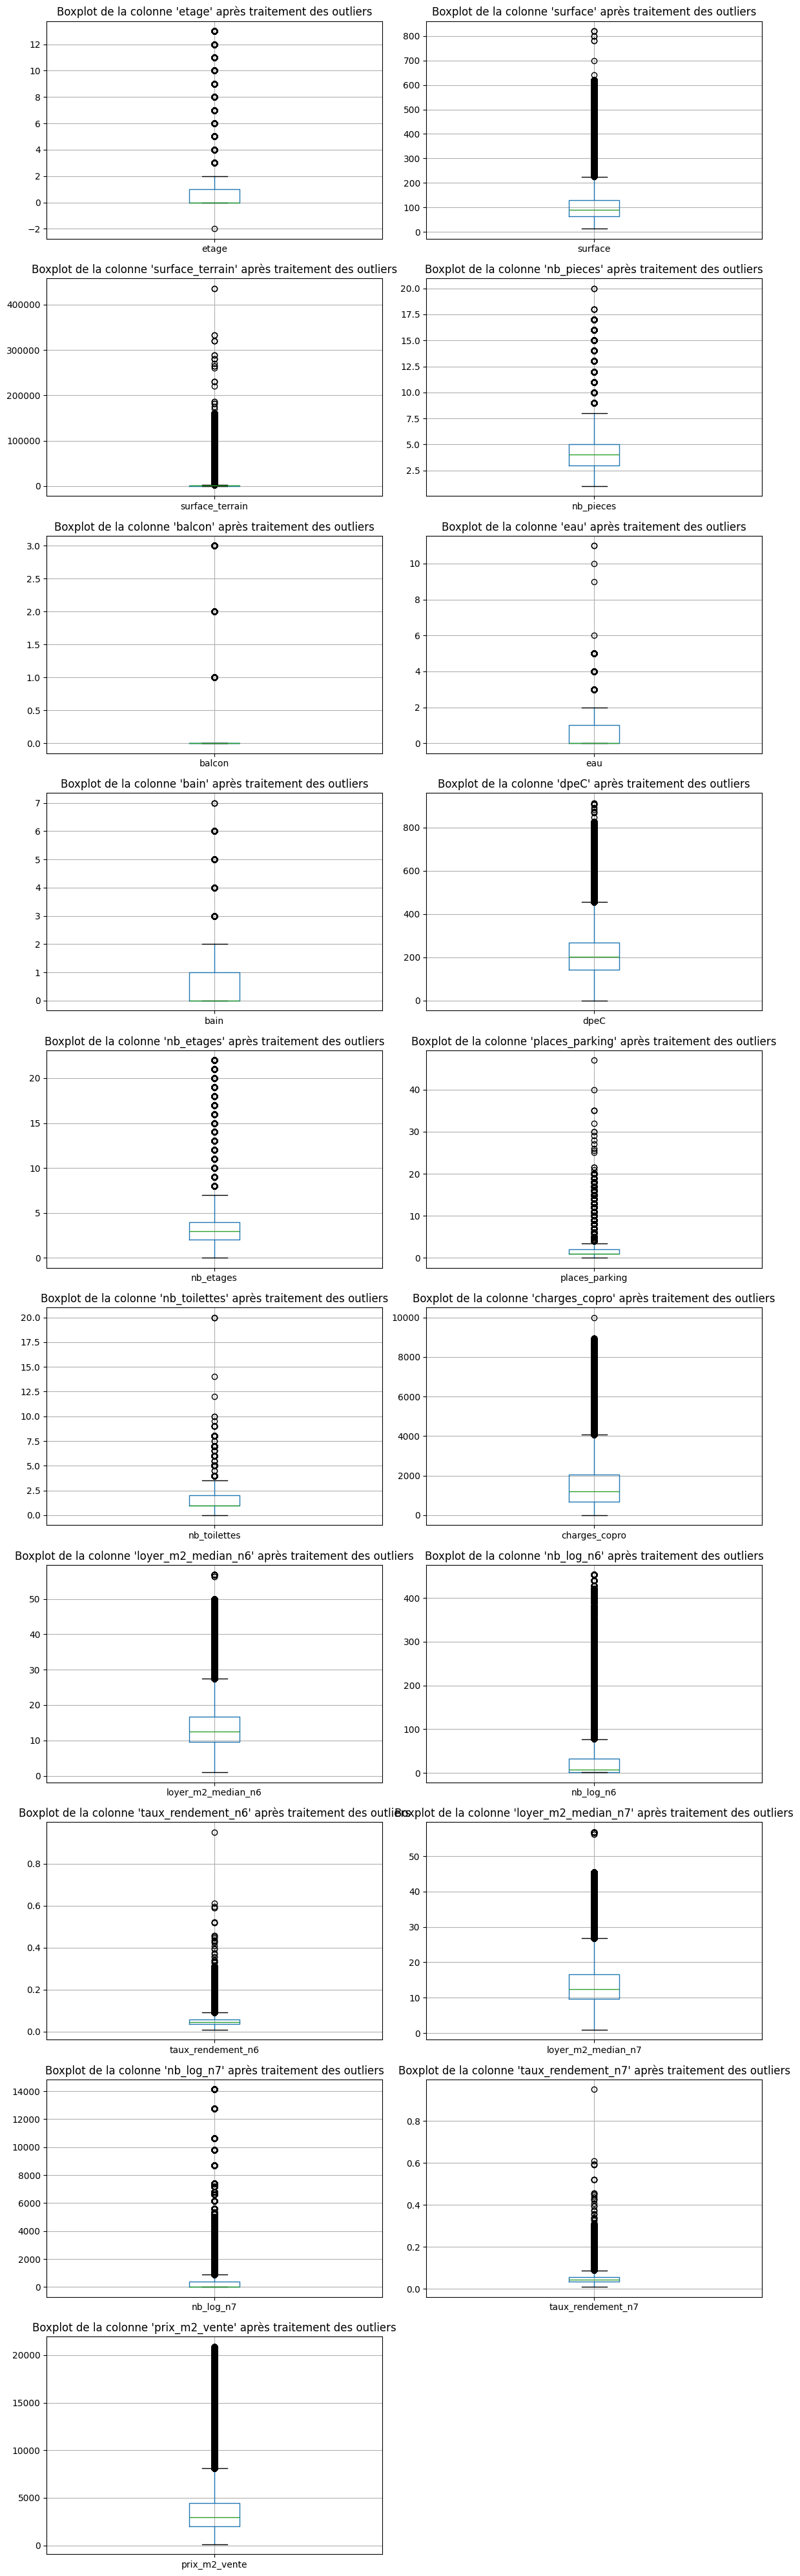

In [25]:

# Nombre de colonnes par ligne
cols_per_row = 2

# Calcul du nombre de lignes nécessaires
num_cols = len(bounds)
num_rows = math.ceil(num_cols / cols_per_row)

# Création des sous-graphiques
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Aplatir pour un accès plus simple

# Boucle pour tracer les boxplots
print("Visualisation des boxplots après traitement des outliers :")
for i, col in enumerate(bounds):
    df_sales_short_3.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f"Boxplot de la colonne '{col}' après traitement des outliers")

# Supprimer les axes inutilisés si le nombre de colonnes est impair
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Visualisation de la distribution de la target

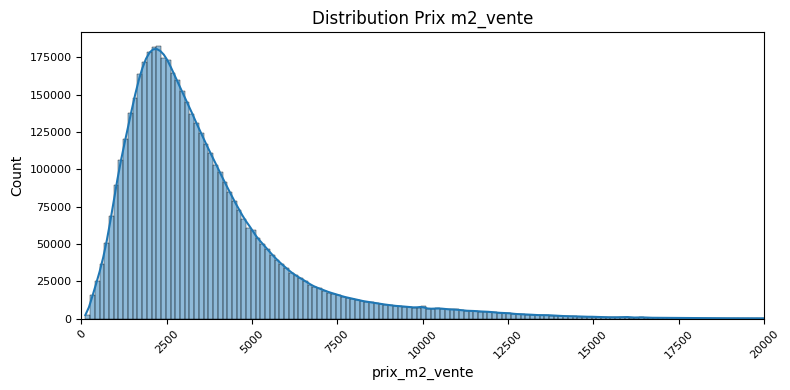

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_sales_short_3['prix_m2_vente'], bins=150, kde=True)
plt.title('Distribution Prix m2_vente')
plt.xticks(rotation=45, fontsize=8)
plt.xlim(0, 20000)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

## Visualisation de la distribution de la surface

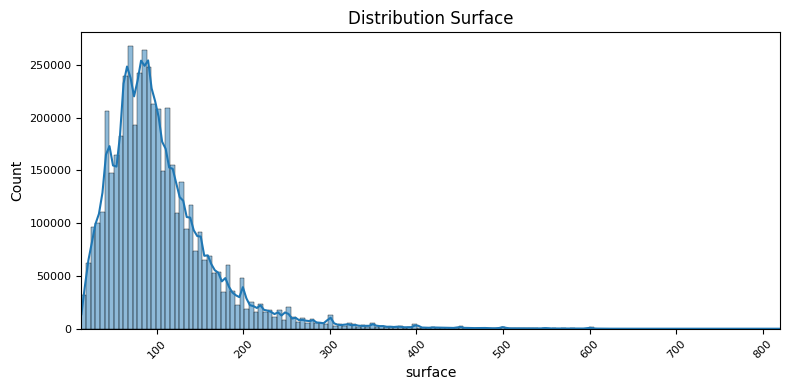

In [27]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_sales_short_3['surface'], bins=150, kde=True)
plt.title('Distribution Surface')

# Ajuster les limites de l'axe X en fonction des valeurs minimales et maximales
plt.xlim(df_sales_short_3['surface'].min(), df_sales_short_3['surface'].max())

plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# SAUVEGARDE DU DATASET

In [ ]:
## paths ##
folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
# folder_path_Y = 'C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON'
# folder_path_C = '../data/processed/Sales'
# folder_path_L = '/Users/loick.d/Documents/Datascientest/Github immo/MAR25_BDS_Compagnon_Immo/'
# folder_path_LW = 'C:/Users/User/Downloads/drive-download-20250508T155351Z-1-001'

## stocker le dataset nettoyé dans le repertoire de travail et le nommer df_sales_clean.csv
df_sales_short_3.to_csv(os.path.join(folder_path_M, 'df_sales_clean.csv'), sep=';', index=False)
# df_sales_short_3.to_csv(os.path.join(folder_path_Y, 'df_sales_clean.csv'), sep=';', index=False)
# df_sales_short_3.to_csv(os.path.join(folder_path_C, 'df_sales_clean.csv'), sep=';', index=False)
# df_sales_short_3.to_csv(os.path.join(folder_path_L, 'df_sales_clean.csv'), sep=';', index=False)
# df_sales_short_3.to_csv(os.path.join(folder_path_LW, 'df_sales_clean.csv'), sep=';', index=False)


# Reload dataset
output_file = os.path.join(folder_path_M, 'df_sales_clean.csv')
# output_file = os.path.join(folder_path_Y, 'df_sales_clean.csv')
# output_file = os.path.join(folder_path_C, 'df_sales_clean_2.csv')
# output_file = os.path.join(folder_path_L, 'df_sales_clean.csv')
# output_file = os.path.join(folder_path_LW, 'df_sales_clean.csv')

chunksize = 100000  # Number of rows per chunk
chunks = pd.read_csv(output_file, sep=';', chunksize=chunksize, index_col=None, on_bad_lines='skip', low_memory=False)
# Process chunks
df_sales_clean = pd.concat(chunk for chunk in chunks)

## Rappel des colonnes restantes
# print("Colonnes restantes dans le DataFrame :")
# print(df_sales_clean.columns)
# print(df_sales_clean.dtypes)
# print("\nShape du Dataset après élimination des colonnes :", df_sales_clean.shape)
print(df_sales_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4873455 entries, 0 to 4873454
Data columns (total 37 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   typedebien                   object 
 1   typedetransaction            object 
 2   etage                        int64  
 3   surface                      int64  
 4   surface_terrain              float64
 5   nb_pieces                    int64  
 6   balcon                       int64  
 7   eau                          int64  
 8   bain                         int64  
 9   dpeL                         object 
 10  dpeC                         float64
 11  mapCoordonneesLatitude       float64
 12  mapCoordonneesLongitude      float64
 13  nb_etages                    float64
 14  places_parking               float64
 15  cave                         bool   
 16  exposition                   object 
 17  ges_class                    object 
 18  annee_construction           object 
 19  